In [35]:

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [36]:

train_dir = "DL_LAB_EXAM/DL_LAB_EXAM/Datasets/forest_fire/Training and Validation"
test_dir = "DL_LAB_EXAM/DL_LAB_EXAM/Datasets/forest_fire/Testing"


In [37]:

img_size = (64, 64)  
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 1467 images belonging to 2 classes.
Found 365 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [38]:

def create_dnn_model():
    model = Sequential([
        Flatten(input_shape=(64, 64, 3)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model


In [39]:
model_adam = create_dnn_model()
model_adam.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_adam = model_adam.fit(train_gen,validation_data=val_gen, epochs=10, verbose=1)

C:\Users\Omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.7757 - loss: 0.6755 - val_accuracy: 0.8466 - val_loss: 0.3512
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9163 - loss: 0.2187 - val_accuracy: 0.8740 - val_loss: 0.3009
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9122 - loss: 0.2185 - val_accuracy: 0.8877 - val_loss: 0.2942
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9383 - loss: 0.1659 - val_accuracy: 0.8822 - val_loss: 0.2956
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9419 - loss: 0.1686 - val_accuracy: 0.8411 - val_loss: 0.4380
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9424 - loss: 0.1627 - val_accuracy: 0.8712 - val_loss: 0.2978
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9472 - loss: 0.1326 - val_accuracy: 0.8685 - val_loss: 0.3890
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9534 - loss: 0.1353 - val_accuracy: 0.8658 - v

In [40]:
y_true = test_gen.classes  


y_pred = (model_adam.predict(test_gen) > 0.5).astype("int32").flatten()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"model_adam Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model_adam Accuracy: 88.24%


In [41]:

model_sgd = create_dnn_model()
model_sgd.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_sgd = model_sgd.fit(train_gen, validation_data=val_gen, epochs=10, verbose=1)


Epoch 1/10


C:\Users\Omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7478 - loss: 0.5898 - val_accuracy: 0.8027 - val_loss: 0.4980
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8722 - loss: 0.4018 - val_accuracy: 0.8274 - val_loss: 0.4343
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8814 - loss: 0.3325 - val_accuracy: 0.8219 - val_loss: 0.4146
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8968 - loss: 0.2948 - val_accuracy: 0.8493 - val_loss: 0.3853
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8960 - loss: 0.2833 - val_accuracy: 0.8411 - val_loss: 0.3849
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9079 - loss: 0.2660 - val_accuracy: 0.8575 - val_loss: 0.3704
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9046 - loss: 0.2511 - val_accuracy: 0.8603 - val_loss: 0.3596
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8968 - loss: 0.2665 - val_accuracy: 0.8575 - val_loss: 0.

In [42]:
y_true = test_gen.classes  
y_pred = (model_sgd.predict(test_gen) > 0.5).astype("int32").flatten()

accuracy = accuracy_score(y_true, y_pred)
print(f"model_sgd Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
model_sgd Accuracy: 85.29%


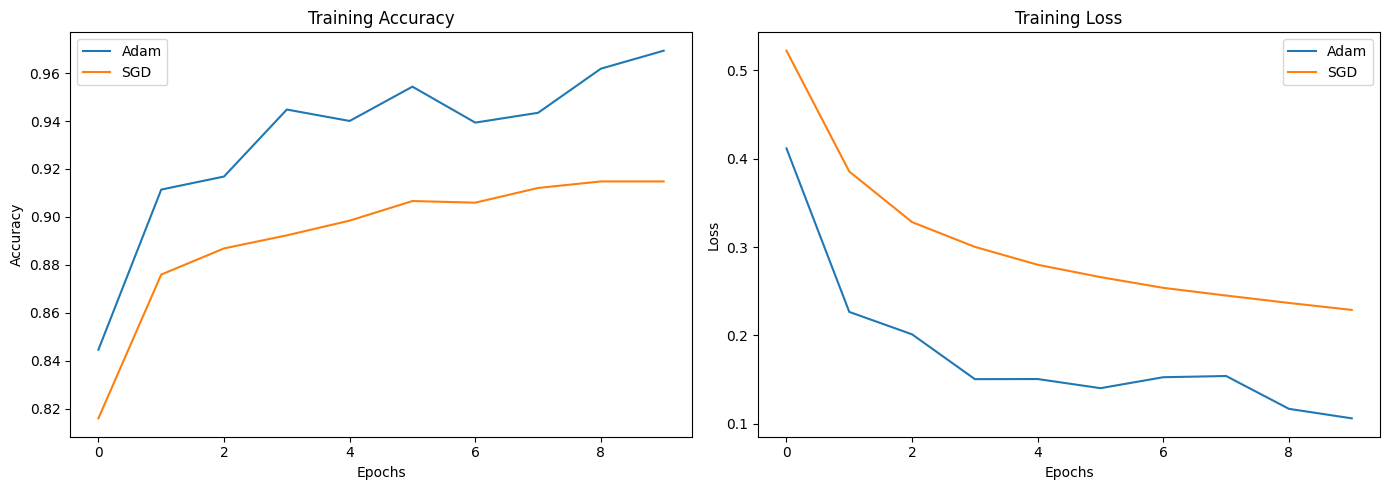

In [43]:

plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['accuracy'], label='Adam')
plt.plot(history_sgd.history['accuracy'], label='SGD')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_adam.history['loss'], label='Adam')
plt.plot(history_sgd.history['loss'], label='SGD')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


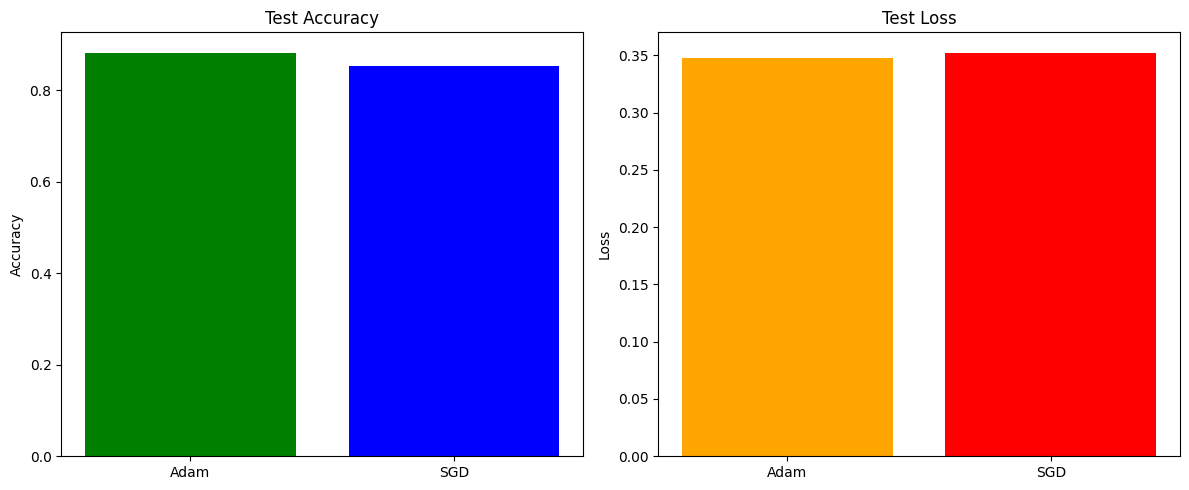

In [44]:

adam_eval = model_adam.evaluate(test_gen, verbose=0)
sgd_eval = model_sgd.evaluate(test_gen, verbose=0)

# Bar chart
labels = ['Adam', 'SGD']
accuracy = [adam_eval[1], sgd_eval[1]]
loss = [adam_eval[0], sgd_eval[0]]

plt.figure(figsize=(12, 5))

# Accuracy Bar
plt.subplot(1, 2, 1)
plt.bar(labels, accuracy, color=['green', 'blue'])
plt.title('Test Accuracy')
plt.ylabel('Accuracy')

# Loss Bar
plt.subplot(1, 2, 2)
plt.bar(labels, loss, color=['orange', 'red'])
plt.title('Test Loss')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


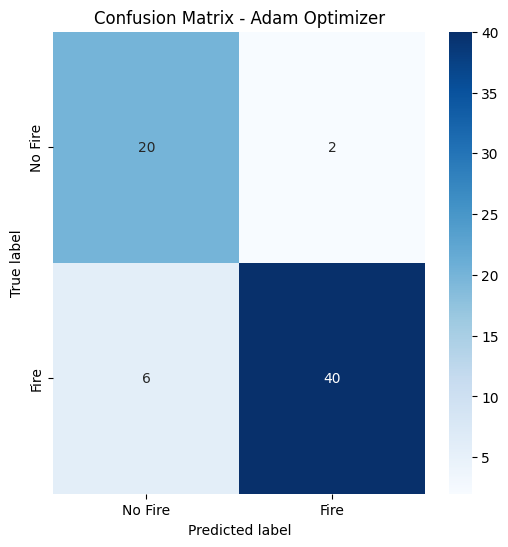

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


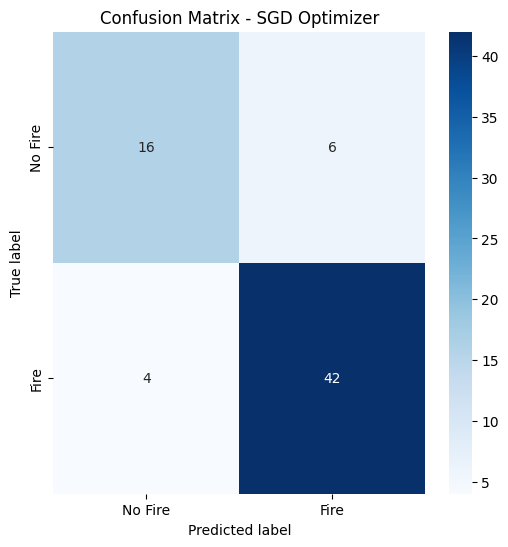

In [45]:


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Fire', 'Fire'], 
                yticklabels=['No Fire', 'Fire'])
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# For Adam model
y_pred_adam = (model_adam.predict(test_gen) > 0.5).astype("int32").flatten()
plot_confusion_matrix(y_true, y_pred_adam, "Confusion Matrix - Adam Optimizer")

# For SGD model
y_pred_sgd = (model_sgd.predict(test_gen) > 0.5).astype("int32").flatten()
plot_confusion_matrix(y_true, y_pred_sgd, "Confusion Matrix - SGD Optimizer")